<a href="https://colab.research.google.com/github/shahab271069/Python-Course/blob/main/Python_Eigth_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with Python

## Course Outline
1. **Introduction to Machine Learning**
2. **Setting Up the Environment**
3. **Supervised Learning**
4. **Neural Networks and Deep Learning**



## 1. Introduction to Machine Learning
- **What is Machine Learning?**  
  Machine Learning is a subset of artificial intelligence that enables systems to learn from data and improve performance over time without being explicitly programmed.
- **Types of Machine Learning:**  
  - **Supervised Learning:** The model is trained on labeled data.
  - **Unsupervised Learning:** The model is trained on unlabeled data.
  - **Reinforcement Learning:** The model learns by interacting with an environment to achieve a goal.

## 2. Setting Up the Environment
To get started with Machine Learning in Python, you need to install the following packages:

```bash
pip install numpy pandas matplotlib scikit-learn keras
```

This command installs essential libraries for data manipulation, visualization, and machine learning.

In [1]:
!pip install numpy pandas matplotlib scikit-learn keras meteostat

## 2. Download data and prepare for study area in Witzenhausen

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(1950, 1, 1)
end = datetime(2024, 12, 31)

# Create Point for Witzenhasen,
vancouver = Point(51.34809372422475, 9.853209171955255, 100)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()
data = data.dropna()

In [11]:
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1975-01-01,7.8,5.0,8.4,0.4,0.0,281.0,12.2,44.6,1027.3,0.0
1975-01-02,7.9,7.4,8.9,0.0,0.0,205.0,3.6,12.6,1032.5,0.0
1975-01-03,4.8,3.4,8.0,0.0,0.0,216.0,9.4,24.8,1029.9,186.0
1975-01-04,5.6,4.4,6.4,0.0,0.0,264.0,13.7,44.6,1028.6,0.0
1975-01-05,6.7,4.9,8.2,1.2,0.0,226.0,13.7,48.2,1023.0,0.0


In [12]:
data.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split
# Prepare features and target
X = data[['tmin', 'tmax', 'wdir', 'wspd', 'wpgt', 'pres','tsun']].iloc[:50*365,:]
y = data['prcp']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## 3. Supervised Learning
### Linear Regression
- **Description:** Linear regression is used for predicting a continuous value based on the relationship between input features and the target variable.


In [43]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')



Linear Regression Mean Squared Error: 12.920099126116266


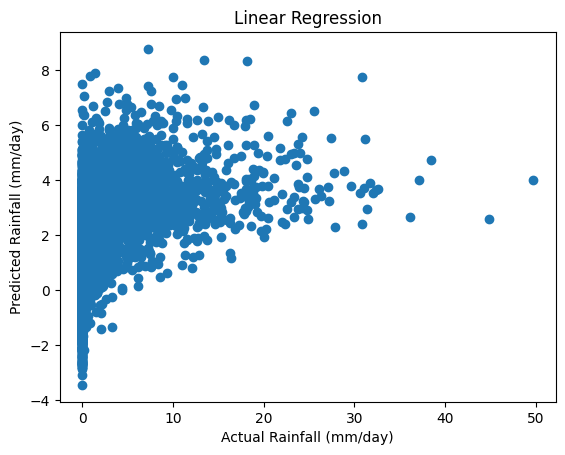

In [44]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('Linear Regression')
plt.show()

### Random Forest
- **Description:** Random Forest is an ensemble learning method that combines multiple decision trees to improve classification and regression tasks.



In [45]:
# Create and train the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'RF Regression Mean Squared Error: {mse}')

RF Regression Mean Squared Error: 12.26875561806564


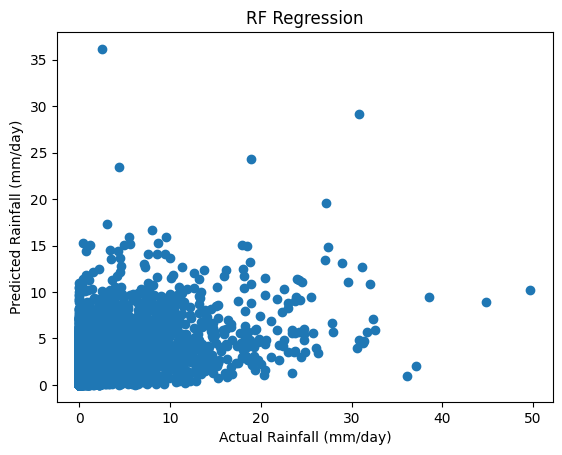

In [46]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('RF Regression')
plt.show()

## 4. Neural Networks and Deep Learning
### Description
- Neural networks are a set of algorithms modeled loosely after the human brain, designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling, and clustering of raw input.




In [32]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons

# Create Neural Network
model_nn = Sequential()
model_nn.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(Dense(200, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=50, batch_size=32)

# Predictions and Evaluation
y_pred = model_nn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'RF Regression Mean Squared Error: {mse}')

Epoch 1/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2468 - loss: 385.4307
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2229 - loss: 17.2708
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2334 - loss: 19.6937
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2347 - loss: 22.7347
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2262 - loss: 22.6467
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2341 - loss: 24.9039
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2338 - loss: 19.6917
Epoch 8/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2300 - loss: 20.7747
Epoch 9/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2235 - loss: 18.2358
Epoch 10/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2172 - loss: 16.1474
Epoch 11/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2239 - loss: 19.3398
Epoch 12/50
323/323 ━━━━━━━━━━━━━━━━━━━━

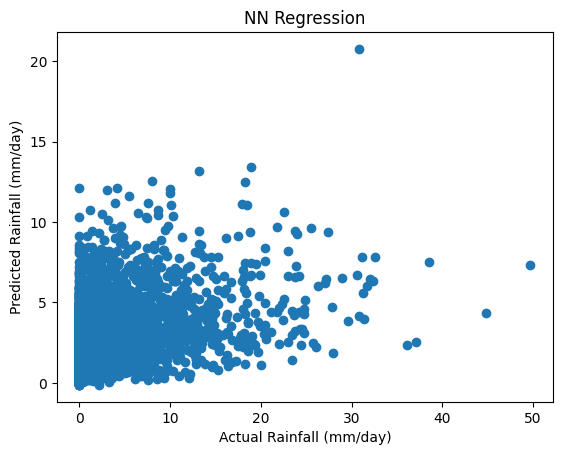

In [33]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('NN Regression')
plt.show()

In [50]:
# Import libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering: create lagged features
def create_lagged_features(df, lag=1):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['prcp'].shift(i)
    return df.dropna()

# Assuming 'precipitation' is the target variable
df = create_lagged_features(data, lag=5)

# Split into features and target
X = df.drop(columns=['prcp']).values
y = df['prcp'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create Neural Network
model_nn = Sequential()
model_nn.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_nn.add(Dropout(0.2))
model_nn.add(BatchNormalization())
model_nn.add(LSTM(64, return_sequences=False))
model_nn.add(Dropout(0.2))
model_nn.add(BatchNormalization())
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the model with validation data
model_nn.fit(X_train, y_train, epochs=100, batch_size=32,
             validation_split=0.2,
             callbacks=[early_stopping])

# Predictions and Evaluation
y_pred = model_nn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Epoch 1/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - loss: 14.1445 - mae: 2.0043 - mse: 14.1445 - val_loss: 14.6583 - val_mae: 1.8625 - val_mse: 14.6583
Epoch 2/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 13.9020 - mae: 1.9249 - mse: 13.9020 - val_loss: 12.1423 - val_mae: 1.8083 - val_mse: 12.1423
Epoch 3/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 11.9072 - mae: 1.8197 - mse: 11.9072 - val_loss: 11.9083 - val_mae: 1.9424 - val_mse: 11.9083
Epoch 4/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 12.5068 - mae: 1.8798 - mse: 12.5068 - val_loss: 11.7910 - val_mae: 1.7801 - val_mse: 11.7910
Epoch 5/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 13.1143 - mae: 1.8714 - mse: 13.1143 - val_loss: 11.8479 - val_mae: 1.7745 - val_mse: 11.8479
Epoch 6/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 12.3557 - mae: 1.8267 - mse: 12.3557 - val_loss: 11.6488 - val_mae: 1.7958 - val_mse: 11.6488
Epoch 7/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 12.64

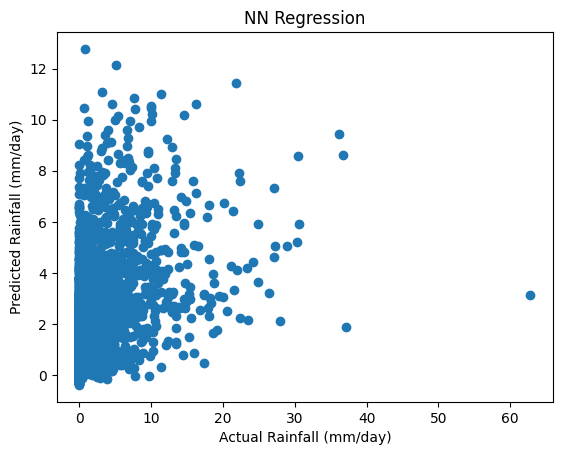

In [51]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('NN Regression')
plt.show()